In [2]:
%%capture
%run 'main.py'

# 1. O Dataset e o Projeto

## Descrição 
<p>Análise dos dados referentes as métricas do projeto X de Dívida Técnica da Ericson. The archival data was collected from 33 product customization tasks (PCs) of this studied project between 2013 and 2016.
</p>

## Dados
<ul>
    <li>Tabela de Métricas</li>
    <li>Tabela do site India</li>
    <li>Tabela do site Sweden</li>
    <li>Tabela do site Italy</li>
    <li>Tabela do site USA</li>
</ul>

### Importando bibliotecas extras (geração de gráficos e análises estatísticas)

In [3]:
# importando o pyplot
from matplotlib import pyplot
# importando o stats 
from scipy import stats

In [4]:
# 1. Tabela de Métricas
df_all_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 12 columns):
uniqueID              32 non-null object
ID                    32 non-null object
location              32 non-null object
maturity              32 non-null float64
totalDevelopers       32 non-null float64
complexityPoints      32 non-null float64
start                 32 non-null object
end                   32 non-null object
leadTime              32 non-null float64
technicalDebt         32 non-null float64
taskScaling           32 non-null float64
taskGlobalDistance    32 non-null float64
dtypes: float64(7), object(5)
memory usage: 4.5+ KB


## 1.1 Amostra de Dados

In [397]:
df_all_metrics.head(3)

,uniqueID,ID,location,maturity,totalDevelopers,complexityPoints,start,end,leadTime,technicalDebt,taskScaling,taskGlobalDistance
0,PC:14187,TURK-372,India,4.0,13.0,60.0,2014-08-11 00:00:00,2015-02-06 00:00:00,179.0,796.0,0.216667,1.250000
1,PC:15448,BHA-328,Virtual,4.0,25.0,170.0,2015-01-19 00:00:00,2015-06-05 00:00:00,137.0,2474.0,0.147059,6.244748
2,PC:13350,TELSTRA-038,India,4.0,7.0,35.0,2015-02-09 00:00:00,2015-04-02 00:00:00,52.0,202.0,0.200000,3.463991


In [517]:
location = df_all_metrics.location.unique()
print("Countries evaluated in the case study: ")
for each in location:
    print(each)

Countries evaluated in the case study: 
India
Virtual
Italy
USA
Sweden


## 1.2 Estatísticas da Tabela de Métricas

In [8]:
df_all_metrics.describe().round(2)

,maturity,totalDevelopers,complexityPoints,leadTime,technicalDebt,taskScaling,taskGlobalDistance
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,3.00,6.31,78.28,77.03,1248.13,0.15,3.34
std,1.68,4.24,115.16,36.89,1468.19,0.11,1.46
min,0.00,2.00,10.00,18.00,0.00,0.01,0.00
25%,2.00,4.00,23.75,50.75,112.75,0.08,3.46
50%,4.00,6.00,42.50,67.00,703.00,0.12,3.46
75%,4.00,7.25,96.25,102.00,1686.50,0.20,3.46
max,4.00,25.00,600.00,179.00,5429.00,0.47,6.24


### Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [9]:
df_all_metrics.corr().round(4)

,maturity,totalDevelopers,complexityPoints,leadTime,technicalDebt,taskScaling,taskGlobalDistance
maturity,1.0000,0.3162,-0.2918,0.0119,-0.0476,0.5259,0.2134
totalDevelopers,0.3162,1.0000,0.2966,0.5913,0.3433,0.0765,0.2219
complexityPoints,-0.2918,0.2966,1.0000,0.3300,0.6088,-0.4695,-0.2742
leadTime,0.0119,0.5913,0.3300,1.0000,0.4088,-0.2425,-0.1703
technicalDebt,-0.0476,0.3433,0.6088,0.4088,1.0000,-0.4190,-0.0258
taskScaling,0.5259,0.0765,-0.4695,-0.2425,-0.4190,1.0000,0.2017
taskGlobalDistance,0.2134,0.2219,-0.2742,-0.1703,-0.0258,0.2017,1.0000


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
The most common correlation coefficient is the Pearson correlation, that uses p or r, measuring the degree of correlation, which is 
sensitive only to a linear relationship between two variables, however, it was chosen Spearmans rank correlation that have been developed 
to be more robust than Pearsons, that is, more sensitive to nonlinear relationships, because TD does not follow a Normal Distribution.    
   </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Pela matriz de correlação, considerando a variável <b>technicalDebt</b>, pode-se perceber que as features <b>totalDevelopers</b>, <b>complexityPoints</b>, <b>leadTime</b> e <b>taskScaling</b> podem ter um bom nível de correlação
</p>

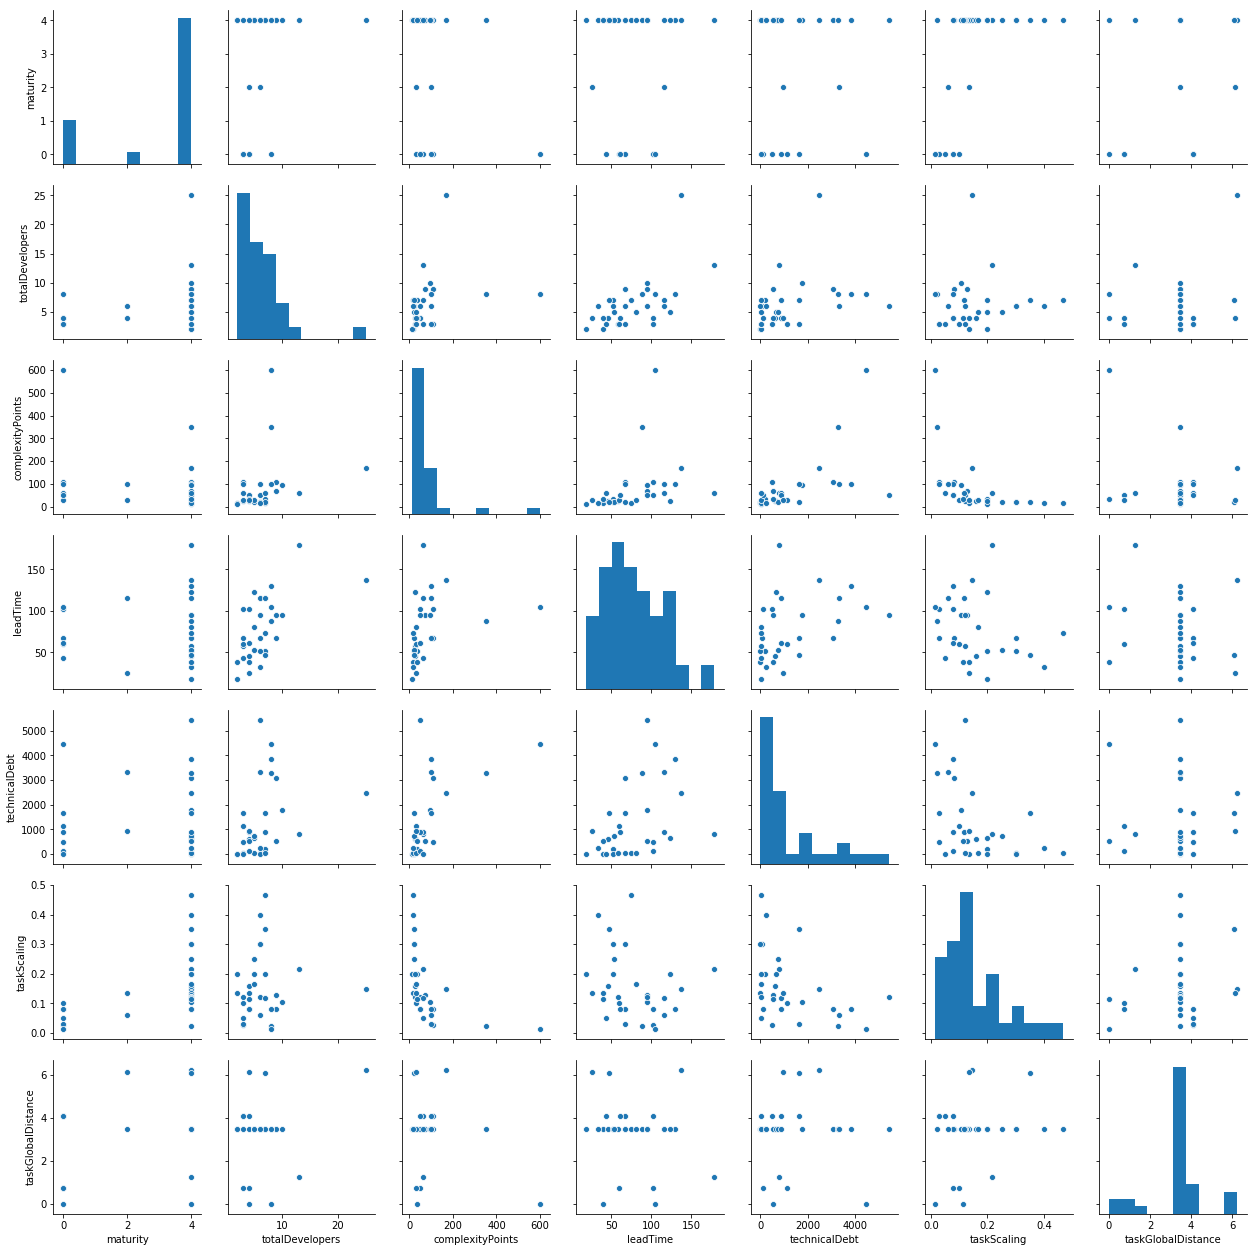

In [10]:
sns.pairplot(df_all_metrics)
plt.show()

## Plotando o pairplot fixando somente uma variável no eixo y

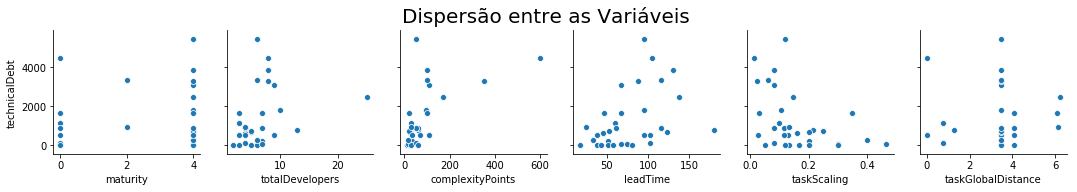

In [11]:
ax = sns.pairplot(df_all_metrics, y_vars='technicalDebt', x_vars=['maturity', 'totalDevelopers', 'complexityPoints', 
                                                                  'leadTime', 'taskScaling', 'taskGlobalDistance'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

### Plotando a variável *dependente* (y)
(pontos de Dívida Técnica ao longo da evolução (em meses) do software)

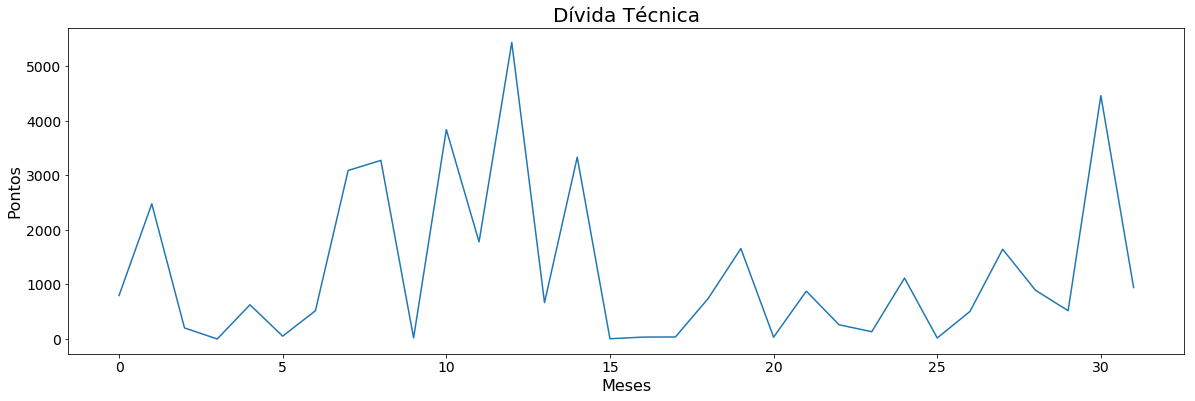

In [12]:
fig, ax = pyplot.subplots(figsize=(20,6))

ax.set_title('Dívida Técnica', fontsize=20)
ax.set_ylabel('Pontos', fontsize=16)
ax.set_xlabel('Meses', fontsize=16)
ax = df_all_metrics['technicalDebt'].plot(fontsize=14)

In [13]:
def show_box_plot(feature):
  sns.boxplot(data=df_all_metrics[feature], orient='h')

def my_describe(feature):
  my_data = df_all_metrics[feature]
  print("Estatísticas dos dados de " + feature)
  print(my_data.describe().round(2))

def my_outliers(feature, limite):
  my_data = df_all_metrics[feature]
  print("Outliers dos dados de " + feature)
  print(my_data[my_data > limite])

In [14]:
def show_distribution(feature):
  ax = sns.distplot(df_all_metrics[feature])
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Distrubuição de Frequências', fontsize=20)
  ax.set_ylabel(feature, fontsize=16)
  ax

### Box plot da variável *dependente* (y)

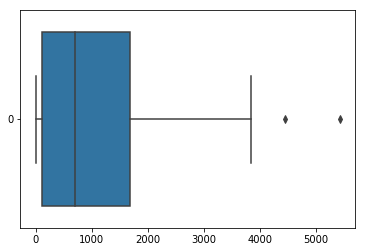

In [15]:
show_box_plot('technicalDebt')

In [16]:
my_describe('technicalDebt')

Estatísticas dos dados de technicalDebt
count      32.00
mean     1248.13
std      1468.19
min         0.00
25%       112.75
50%       703.00
75%      1686.50
max      5429.00
Name: technicalDebt, dtype: float64


In [17]:
my_outliers('technicalDebt', 4000)

Outliers dos dados de technicalDebt
12    5429.0
30    4455.0
Name: technicalDebt, dtype: float64


### Box plot da feature1 (x1)

In [18]:
feature1 = 'leadTime'

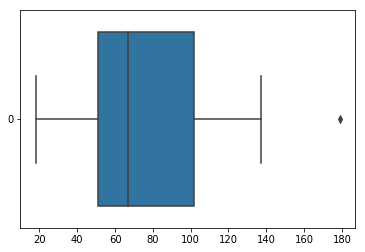

In [19]:
show_box_plot(feature1)

In [20]:
my_describe(feature1)

Estatísticas dos dados de leadTime
count     32.00
mean      77.03
std       36.89
min       18.00
25%       50.75
50%       67.00
75%      102.00
max      179.00
Name: leadTime, dtype: float64


In [21]:
my_outliers(feature1, 160)

Outliers dos dados de leadTime
0    179.0
Name: leadTime, dtype: float64


### Box plot da feature 2 (x2)

In [22]:
feature2 = 'complexityPoints'

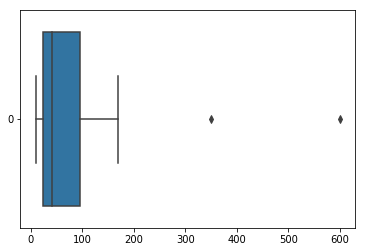

In [23]:
show_box_plot(feature2)

In [24]:
my_describe(feature2)

Estatísticas dos dados de complexityPoints
count     32.00
mean      78.28
std      115.16
min       10.00
25%       23.75
50%       42.50
75%       96.25
max      600.00
Name: complexityPoints, dtype: float64


In [25]:
my_outliers(feature2, 300)

Outliers dos dados de complexityPoints
8     350.0
30    600.0
Name: complexityPoints, dtype: float64


### Box plot da feature 3 (x3)

In [26]:
feature3 = 'maturity'

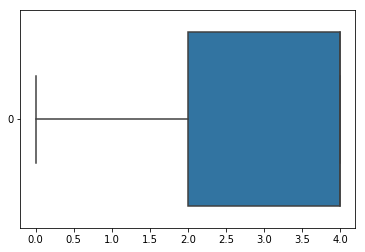

In [27]:
show_box_plot(feature3)

In [28]:
my_describe(feature3)

Estatísticas dos dados de maturity
count    32.00
mean      3.00
std       1.68
min       0.00
25%       2.00
50%       4.00
75%       4.00
max       4.00
Name: maturity, dtype: float64


### Box plot da feature 4 (x4)

In [29]:
feature4 = 'taskGlobalDistance'

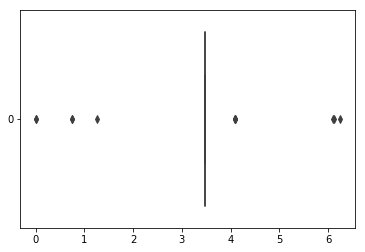

In [30]:
show_box_plot(feature4)

In [31]:
my_describe(feature4)

Estatísticas dos dados de taskGlobalDistance
count    32.00
mean      3.34
std       1.46
min       0.00
25%       3.46
50%       3.46
75%       3.46
max       6.24
Name: taskGlobalDistance, dtype: float64


### Box plot da feature 5 (x5)

In [32]:
feature5 = 'taskScaling'

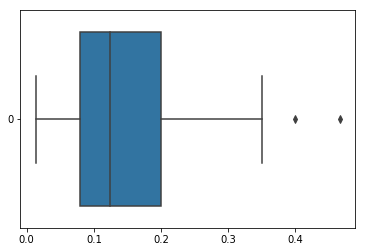

In [33]:
show_box_plot(feature5)

In [34]:
my_describe(feature5)

Estatísticas dos dados de taskScaling
count    32.00
mean      0.15
std       0.11
min       0.01
25%       0.08
50%       0.12
75%       0.20
max       0.47
Name: taskScaling, dtype: float64


### Box plot da feature 6 (x6)

In [35]:
feature6 = 'totalDevelopers'

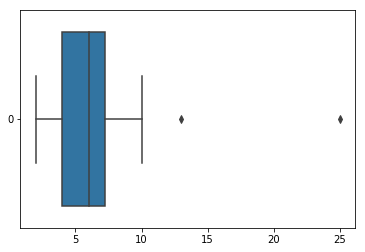

In [36]:
show_box_plot(feature6)

In [37]:
my_describe(feature6)

Estatísticas dos dados de totalDevelopers
count    32.00
mean      6.31
std       4.24
min       2.00
25%       4.00
50%       6.00
75%       7.25
max      25.00
Name: totalDevelopers, dtype: float64


In [38]:
my_outliers(feature6, 10)

Outliers dos dados de totalDevelopers
0    13.0
1    25.0
Name: totalDevelopers, dtype: float64


### Distribuição de frequências da variável *dependente* (y)

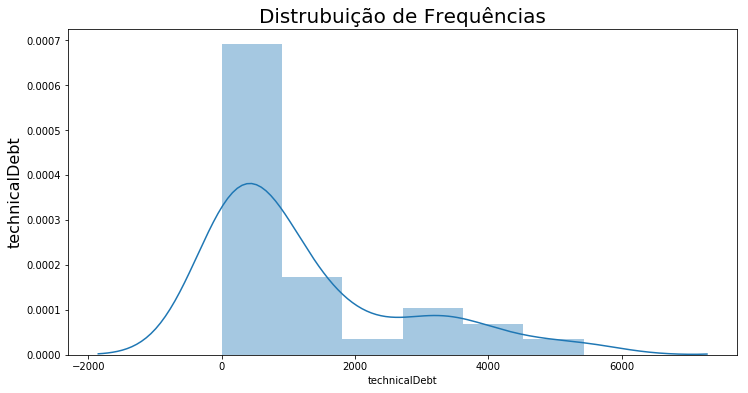

In [39]:
show_distribution('technicalDebt')

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Pela Distribuição de Frequências da Dívida Técnica, pode-se perceber que ela não segue uma distribuição normal
</p>

### Distribuição de frequências da feature *LeadTime* (x1)

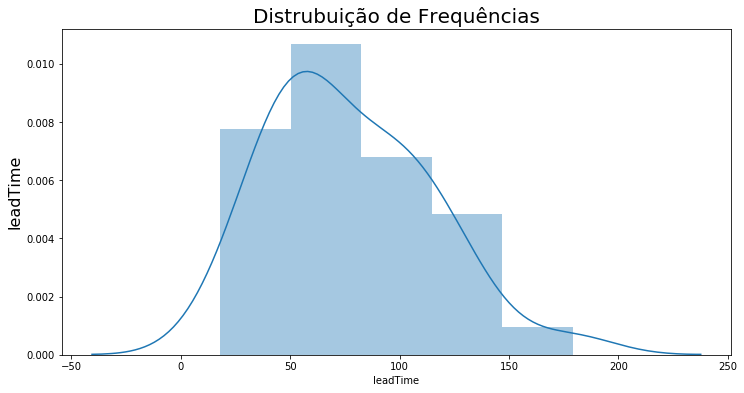

In [40]:
show_distribution('leadTime')

### Distribuição de frequências da feature *ComplexityPoints* (x2)

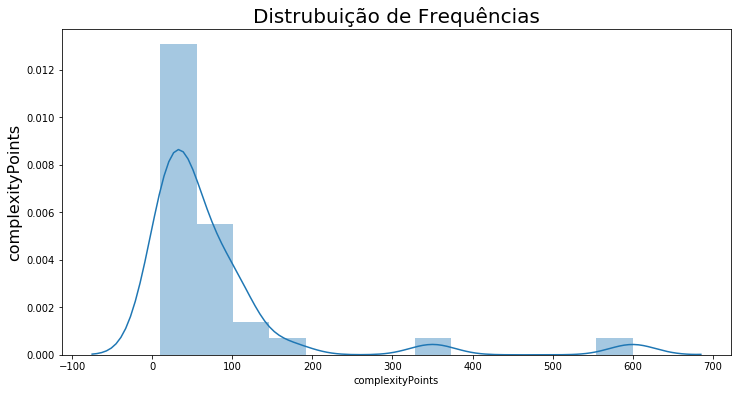

In [41]:
show_distribution('complexityPoints')

### Distribuição de frequências da feature *Maturity* (x3)

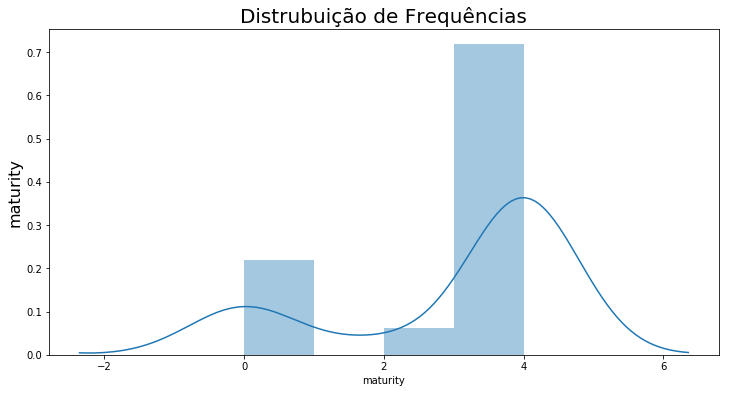

In [42]:
show_distribution('maturity')

### Distribuição de frequências da feature *TaskGlobalDistance* (x4)

In [43]:
###?

### Distribuição de frequências da feature *TotalDevelopers* (x5)

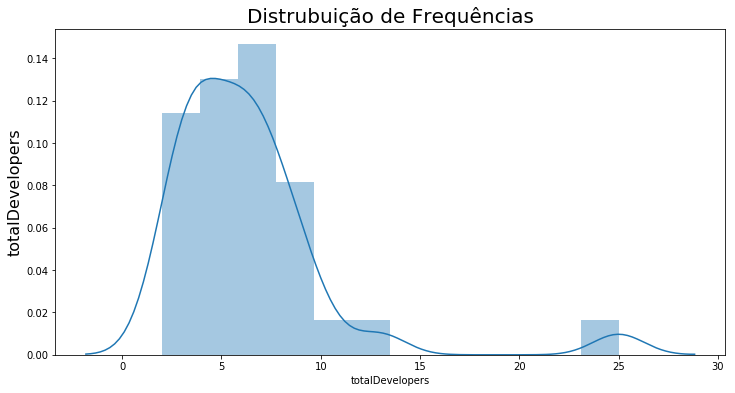

In [44]:
show_distribution('totalDevelopers')

### Boxplot Technical Debt x Location

Text(0.5,1,'Boxplot Distribuition Technical Debt x Location')

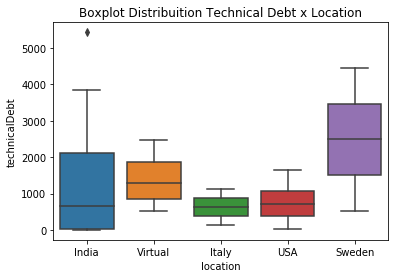

In [45]:
sns.boxplot(x='location', y='technicalDebt', data=df_all_metrics).set_title('Boxplot Distribuition Technical Debt x Location')

## 1.3 Analisando as correlações entre as features (xi) e a variável dependente (y)

### 1.3.1 Gráfico de Correlação entre LeadTime (x1) e Technical Debt (y)

In [46]:
arrayLeadTime = df_all_metrics.leadTime.values
arrayTechnicalDebt = df_all_metrics.technicalDebt.values

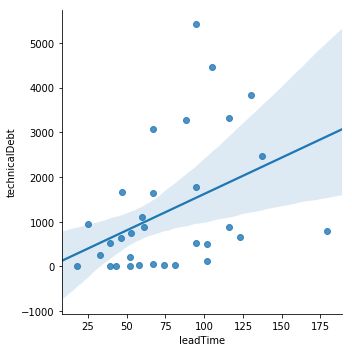

In [48]:
sns.lmplot(x='leadTime', y='technicalDebt', data=df_all_metrics)

In [49]:
def checkSpearmansCorrelations(coef,p, alfa):
    print('Spearmans correlation coefficient: %.3f' % coef)
    # interpret the significance
    if p > alfa:
	    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
	    print('Samples are correlated (reject H0) p=%.3f' % p)

### 1.3.1.1 Calculate spearman's correlation (LeadTime x TD)

In [50]:
stats.spearmanr(arrayLeadTime, arrayTechnicalDebt)

SpearmanrResult(correlation=0.48587185407612227, pvalue=0.004814195878751078)

In [51]:
type(stats.spearmanr(arrayLeadTime, arrayTechnicalDebt))

scipy.stats.stats.SpearmanrResult

In [52]:
# calculate spearman's correlation
coefLeadTime, pLeadTime = stats.spearmanr(arrayLeadTime, arrayTechnicalDebt)

In [53]:
alfa = 0.05

In [54]:
checkSpearmansCorrelations(coefLeadTime, pLeadTime, alfa)

Spearmans correlation coefficient: 0.486
Samples are correlated (reject H0) p=0.005


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Pela análise do coeficiente de Spearman, pode-se perceber que <u>LeadTime</u> e <u>TD</u> <b>são</b> <u>correlacionados</u>. Com isso, existe uma tendência de que na medida que o LeadTime aumenta a Dívida Técnica tende a aumentar
</p>

### 1.3.2 Gráfico de Correlação entre ComplexityPoint (x2) e Technical Debt (y)

In [55]:
arrayComplexityPoints = df_all_metrics.complexityPoints.values

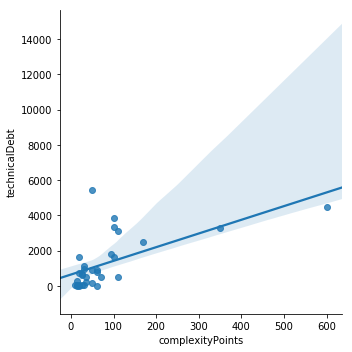

In [57]:
sns.lmplot(x='complexityPoints', y='technicalDebt', data=df_all_metrics)

### 1.3.2.1 Calculate spearman's correlation (ComplexityPoints x TD)

In [58]:
# calculate spearman's correlation
coefComplexityPoints, pComplexityPoints = stats.spearmanr(arrayComplexityPoints, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefComplexityPoints, pComplexityPoints, alfa)

Spearmans correlation coefficient: 0.650
Samples are correlated (reject H0) p=0.000


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>ComplexityPoints</u> e <u>TD</u> <b>são</b> <u>correlacionados</u>. Com isso, existe uma tendência de que na medida que o ComplexityPoints aumenta a Dívida Técnica tende a aumentar.
</p>

### 1.3.3 Gráfico de Correlação entre Maturity (x3) e Technical Debt (y)

In [59]:
arrayMaturity = df_all_metrics.maturity.values

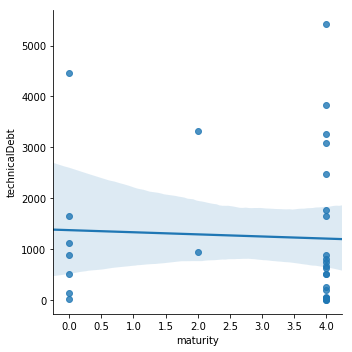

In [61]:
sns.lmplot(x='maturity', y='technicalDebt', data=df_all_metrics)

### 1.3.3.1 Calculate spearman's correlation (Maturity x TD)

In [62]:
# calculate spearman's correlation
coefMaturity, pMaturity = stats.spearmanr(arrayMaturity, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefMaturity, pMaturity, alfa)

Spearmans correlation coefficient: -0.135
Samples are uncorrelated (fail to reject H0) p=0.462


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>Maturity</u> e <u>TD</u> <b>NÃO são</b> <u>correlacionados</u>.
</p>

### 1.3.4 Gráfico de Correlação entre TaskGlobalDistance (x4) e Technical Debt (y)

In [63]:
arrayTaskGlobalDistance = df_all_metrics.taskGlobalDistance.values

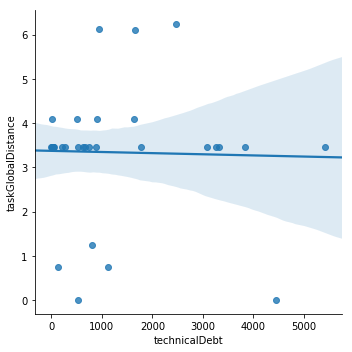

In [65]:
sns.lmplot(x='technicalDebt', y='taskGlobalDistance', data=df_all_metrics)

### 1.3.4.1 Calculate spearman's correlation (TaskGlobalDistance x TD)

In [66]:
# calculate spearman's correlation
coefTaskGlobalDistance, pTaskGlobalDistance = stats.spearmanr(arrayTaskGlobalDistance, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefTaskGlobalDistance, pTaskGlobalDistance, alfa)

Spearmans correlation coefficient: 0.034
Samples are uncorrelated (fail to reject H0) p=0.855


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>TaskGlobalDistance</u> e <u>TD</u> <b>NÃO são</b> <u>correlacionados</u>.
</p>

### 1.3.5 Gráfico de Correlação entre totalDevelopers (x5) e Technical Debt (y)

In [67]:
arrayTotalDevelopers = df_all_metrics.totalDevelopers.values

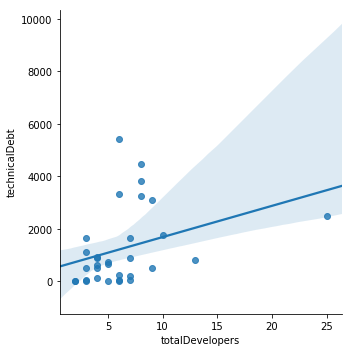

In [69]:
sns.lmplot(x='totalDevelopers', y='technicalDebt', data=df_all_metrics)

### 1.3.5.1 Calculate spearman's correlation (TotalDevelopers x TD)

In [70]:
# calculate spearman's correlation
coefTotalDevelopers, pTotalDevelopers = stats.spearmanr(arrayTotalDevelopers, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefTotalDevelopers, pTotalDevelopers, alfa)

Spearmans correlation coefficient: 0.505
Samples are correlated (reject H0) p=0.003


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>TotalDevelopers</u> e <u>TD</u> <b>são</b> <u>correlacionados</u>. Com isso, existe uma tendência de que na medida que o ComplexityPoints aumenta a Dívida Técnica tende a aumentar.
</p>

### 1.3.6 Gráfico de Correlação entre taskScaling e Technical Debt

In [71]:
arrayTaskScaling = df_all_metrics.taskScaling.values

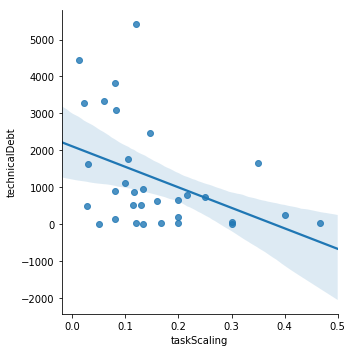

In [73]:
sns.lmplot(x='taskScaling', y='technicalDebt', data=df_all_metrics)

### 1.3.6.1 Calculate spearman's correlation (taskScaling x TD)

In [74]:
coefTaskScaling, pTaskScaling = stats.spearmanr(arrayTaskScaling, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefTaskScaling, pTaskScaling, alfa)

Spearmans correlation coefficient: -0.439
Samples are correlated (reject H0) p=0.012


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>TaskScaling</u> e <u>TD</u> <b>são</b> <u>correlacionados</u>. 
</p>

## 1.4 Resumo da análise de correlação (Spearman's correlation coefficient)

|  Caracterítica     | Dívida Técnica  | Correlacionado |  
|--------------------|-----------------|----------------|
| LeadTime           | TD              | SIM            |
| ComplexityPoints   | TD              | SIM            |
| TotalDevelopers    | TD              | SIM            |
| TaskScaling        | TD              | SIM            | 
| Maturity           | TD              | Não            | 
| TaskGlobalDistance | TD              | Não            |

In [75]:
from tabulate import tabulate

In [76]:
def showCalcPSpearman(p, alfa):
    if p > alfa:
        return 'NÃO'
    else:
        return 'SIM'

In [77]:
LeadTimeRow = ['LeadTime', 'TD', coefLeadTime.round(3), pLeadTime.round(3), 
               showCalcPSpearman(pLeadTime, 0.05)]

ComplexityPointsRow = ['ComplexityPoints', 'TD', coefComplexityPoints.round(3), pComplexityPoints.round(3),
                       showCalcPSpearman(pComplexityPoints, 0.05)]

TotalDevelopersRow = ['TotalDevelopers', 'TD', coefTotalDevelopers.round(3), pTotalDevelopers.round(3),
                      showCalcPSpearman(pTotalDevelopers, 0.05)]

TaskScalingRow = ['TaskScaling', 'TD', coefTaskScaling.round(3), pTaskScaling.round(3), 
                  showCalcPSpearman(pTaskScaling, 0.05)]

MaturityRow = ['Maturity', 'TD', coefMaturity.round(3), pMaturity.round(3), 
               showCalcPSpearman(pMaturity, 0.05)]

TaskGlobalDistanceRow = ['TaskGlobalDistance', 'TD', coefTaskGlobalDistance.round(3), pTaskGlobalDistance.round(3),
                         showCalcPSpearman(pTaskGlobalDistance, 0.05)]

analysisHeaders = ['Característica', 'Dívida Técnica', 'Spearmans Coef', 'p', 'Correlacionado']

print(tabulate([LeadTimeRow, ComplexityPointsRow, TotalDevelopersRow, 
                TaskScalingRow, MaturityRow, TaskGlobalDistanceRow],
               headers=analysisHeaders))

Característica      Dívida Técnica      Spearmans Coef      p  Correlacionado
------------------  ----------------  ----------------  -----  ----------------
LeadTime            TD                           0.486  0.005  SIM
ComplexityPoints    TD                           0.65   0      SIM
TotalDevelopers     TD                           0.505  0.003  SIM
TaskScaling         TD                          -0.439  0.012  SIM
Maturity            TD                          -0.135  0.462  NÃO
TaskGlobalDistance  TD                           0.034  0.855  NÃO


# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para a Dívida Técnica</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [144]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a Dívida Técnica (TD ) (y)

In [145]:
df_all_metrics.head(3)

,uniqueID,ID,location,maturity,totalDevelopers,complexityPoints,start,end,leadTime,technicalDebt,taskScaling,taskGlobalDistance
0,PC:14187,TURK-372,India,4.0,13.0,60.0,2014-08-11 00:00:00,2015-02-06 00:00:00,179.0,796.0,0.216667,1.250000
1,PC:15448,BHA-328,Virtual,4.0,25.0,170.0,2015-01-19 00:00:00,2015-06-05 00:00:00,137.0,2474.0,0.147059,6.244748
2,PC:13350,TELSTRA-038,India,4.0,7.0,35.0,2015-02-09 00:00:00,2015-04-02 00:00:00,52.0,202.0,0.200000,3.463991


In [146]:
y = df_all_metrics.technicalDebt

In [518]:
y.describe().round(2)

count      32.00
mean     1248.13
std      1468.19
min         0.00
25%       112.75
50%       703.00
75%      1686.50
max      5429.00
Name: technicalDebt, dtype: float64

In [147]:
my_dict

{0: 'technicalDebt',
 1: 'leadTime',
 2: 'complexityPoints',
 3: 'totalDevelopers',
 4: 'taskScaling',
 5: 'maturity',
 6: 'taskGlobalDistance'}

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X1, X2, X3, X4)

In [148]:
X = df_all_metrics[[my_dict[1], my_dict[2], my_dict[3], my_dict[4]]]

In [149]:
X.head(5)

,leadTime,complexityPoints,totalDevelopers,taskScaling
0,179.0,60.0,13.0,0.216667
1,137.0,170.0,25.0,0.147059
2,52.0,35.0,7.0,0.200000
3,39.0,15.0,2.0,0.133333
4,46.0,25.0,4.0,0.160000


In [398]:
X.describe().round(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
count,32.000,32.000,32.000,32.000
mean,77.031,78.281,6.312,0.155
std,36.887,115.162,4.238,0.111
min,18.000,10.000,2.000,0.013
25%,50.750,23.750,4.000,0.080
50%,67.000,42.500,6.000,0.124
75%,102.000,96.250,7.250,0.200
max,179.000,600.000,25.000,0.467


## Criando os datasets de treino e de teste

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [284]:
X_train.shape

(22, 4)

In [285]:
X_test.shape

(10, 4)

In [286]:
y_train.shape

(22,)

In [287]:
y_test.shape

(10,)

## Função de Regressão com 4 variáveis
Y = B0 + B1x1 + B2x2 + B3x3 + B4x4

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [289]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [400]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [292]:
print('R^2 : {}'.format(modelo.score(X_train, y_train).round(2)))

R^2 : 0.65


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [293]:
y_previsto = modelo.predict(X_test)

In [295]:
y_previsto.shape

(10,)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [297]:
print('Rˆ2 = ', metrics.r2_score(y_test, y_previsto).round(2))

Rˆ2 =  0.06


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

In [401]:
X_test.head(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
6,95.0,70.0,9.0,0.128571
26,102.0,110.0,3.0,0.027273
25,43.0,60.0,3.0,0.050000


In [299]:
X_test.describe().round(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
count,10.000,10.000,10.000,10.000
mean,70.900,50.500,5.300,0.140
std,25.736,32.952,2.584,0.083
min,39.000,15.000,2.000,0.027
25%,45.500,22.500,3.250,0.108
50%,74.000,42.500,5.000,0.124
75%,95.000,67.500,6.000,0.158
max,102.000,110.000,10.000,0.300


## Dados de entrada

In [402]:
entrada = X_test[0:1]
entrada

,leadTime,complexityPoints,totalDevelopers,taskScaling
6,95.0,70.0,9.0,0.128571


## Gerando previsão pontual

In [403]:
modelo.predict(entrada)[0].round(3)

1523.998

## Criando um simulador simples

In [404]:
x1 = 95
x2 = 70
x3 = 9
x4 = 0.128
minha_entrada = [[x1, x2, x3, x4]]
minha_entrada

[[95, 70, 9, 0.128]]

In [405]:
minha_entrada

[[95, 70, 9, 0.128]]

In [407]:
print('Com a x1={}, x2={}, x3={}, x4={} a previsão de Dívida Técnica (TD) será de {} pontos'.format
      (x1, x2, x3, x4, modelo.predict(minha_entrada)[0].round(2)))

Com a x1=95, x2=70, x3=9, x4=0.128 a previsão de Dívida Técnica (TD) será de 1525.88 pontos


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Dívida Técnica) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Dívida Técnica) quando $X_1$ (leadTime), $X_2$ (complexityPoints), $X_3$ (totalDevelopers), $X_4$ (taskScaling) são iguais a zero.
Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_1$ sobre o valor médio de $Y$, excluídos os efeitos que $X_2$, $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

## Confirmando a ordem das variáveis explicativas no DataFrame

In [306]:
X.columns

Index(['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling'], dtype='object')

In [410]:
modelo.intercept_

894.6683937656759

In [411]:
modelo.coef_

array([ 1.93489284e+00,  5.48273811e+00,  5.39817369e+01, -3.29865356e+03])

In [412]:
my_coeficientes

['intercepto',
 'leadTime',
 'complexityPoints',
 'totalDevelopers',
 'taskScaling']

## Criando uma lista com os nomes das variáveis do modelo

In [307]:
my_coeficientes = ['intercepto', 'leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']

In [408]:
print("B0={} B1={}  B2={} B3={} B4={}".format(
    modelo.intercept_.round(3), modelo.coef_[0].round(3), 
    modelo.coef_[1].round(3), modelo.coef_[2].round(3), 
    modelo.coef_[3].round(3)))

B0=894.668 B1=1.935  B2=5.483 B3=53.982 B4=-3298.654


## Criando um dicionário com os coeficientes das variáveis do modelo

In [310]:
dict_coeficientes = {my_coeficientes[0]:modelo.intercept_.round(3), my_coeficientes[1]:modelo.coef_[0].round(3), 
                     my_coeficientes[2]:modelo.coef_[1].round(3), my_coeficientes[3]:modelo.coef_[2].round(3),
                     my_coeficientes[4]:modelo.coef_[3].round(3)}
dict_coeficientes

{'intercepto': 894.668,
 'leadTime': 1.935,
 'complexityPoints': 5.483,
 'totalDevelopers': 53.982,
 'taskScaling': -3298.654}

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [527]:
df_my_coeficientes = pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=my_coeficientes, columns=['valor'])
df_my_coeficientes.round(2)

,valor
intercepto,894.67
leadTime,1.93
complexityPoints,5.48
totalDevelopers,53.98
taskScaling,-3298.65


In [530]:
df_my_coeficientes.round(2).valor

intercepto           894.67
leadTime               1.93
complexityPoints       5.48
totalDevelopers       53.98
taskScaling        -3298.65
Name: valor, dtype: float64

## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_1=X_2=X_3=X_4=0$) o efeito médio na Dívida Técnica seria de <b> 894.67 pontos</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>leadTime</b> → Mantendo-se os valores de $X_2$ (complexityPoints), $X_3$ (totalDevelopers) e $X_4$ (taskScaling) constantes, o acréscimo de 1 ponto na Dívida Técnica (TD) gera uma variação média no leadTime de <b>1.93</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>complexityPoints</b> → Mantendo-se os valores de $X_1$ (leadTime), $X_3$ (totalDevelopers) e $X_4$ (taskScaling) constantes, o acréscimo de 1 ponto na Dívida Técnica (TD) gera uma variação média no complexityPoints de <b>5.48</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>totalDevelopers</b> → Mantendo-se os valores de $X_1$ (leadTime), $X_2$ (complexityPoints) e $X_4$ (taskScaling) constantes, o acréscimo de 1 ponto na Dívida Técnica (TD) gera uma variação média no totalDevelopers de <b>53.98</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>taskScaling</b> → Mantendo-se os valores de $X_1$ (leadTime), $X_2$ (complexityPoints) e $X_3$ (totalDevelopers) constantes, o acréscimo de 1 ponto na Dívida Técnica (TD) gera uma variação média no taskScaling de <b>-3298.65</b>.
</p>

In [312]:
print("Y = {} + {}({}) + {}({}) + {}({}) + {}({})".format(modelo.intercept_.round(3), 
     dict_coeficientes[my_coeficientes[1]].round(3), my_coeficientes[1], 
     dict_coeficientes[my_coeficientes[2]].round(3), my_coeficientes[2], 
     dict_coeficientes[my_coeficientes[3]].round(3), my_coeficientes[3], 
     dict_coeficientes[my_coeficientes[4]].round(3), my_coeficientes[4]))

Y = 894.668 + 1.935(leadTime) + 5.483(complexityPoints) + 53.982(totalDevelopers) + -3298.654(taskScaling)


# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [313]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

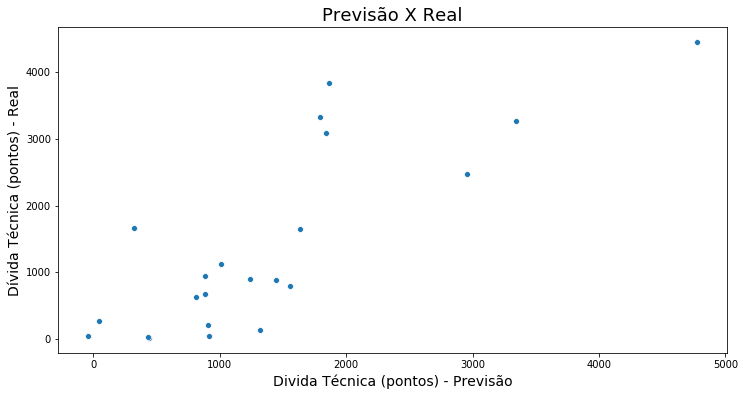

In [315]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Divida Técnica (pontos) - Previsão', fontsize=14)
ax.set_ylabel('Dívida Técnica (pontos) - Real', fontsize=14)
ax

## Obtendo os resíduos

In [316]:
residuo = y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

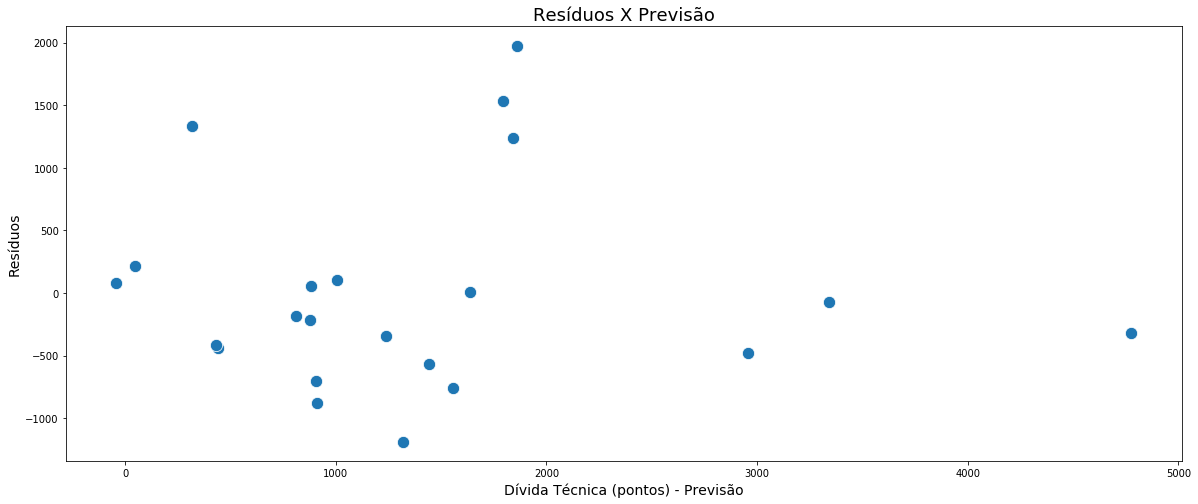

In [318]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Dívida Técnica (pontos) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Utilizando os resíduos ao quadrado


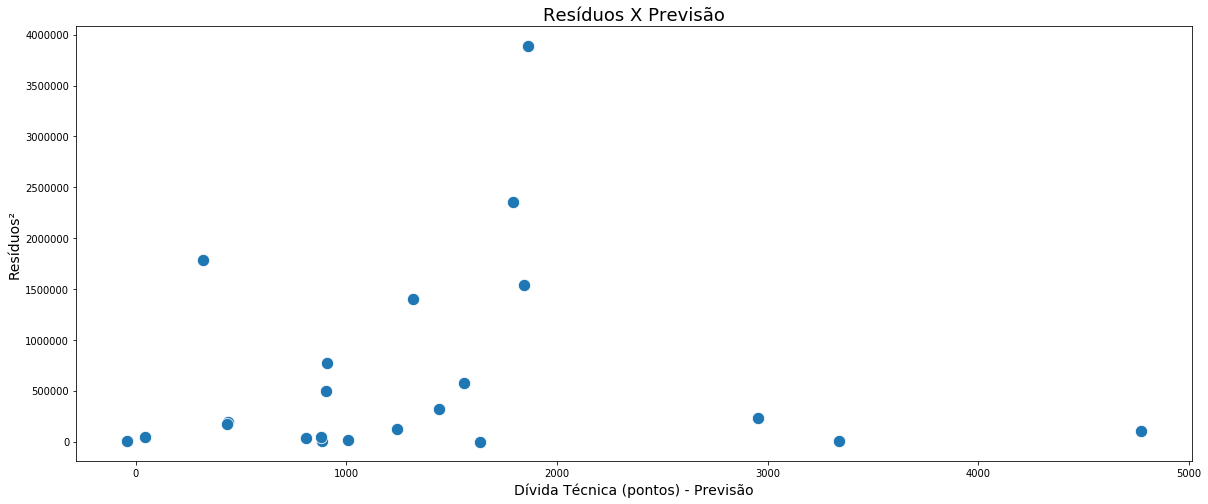

In [319]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Dívida Técnica (pontos) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

## Plotando a distribuição de frequências dos resíduos

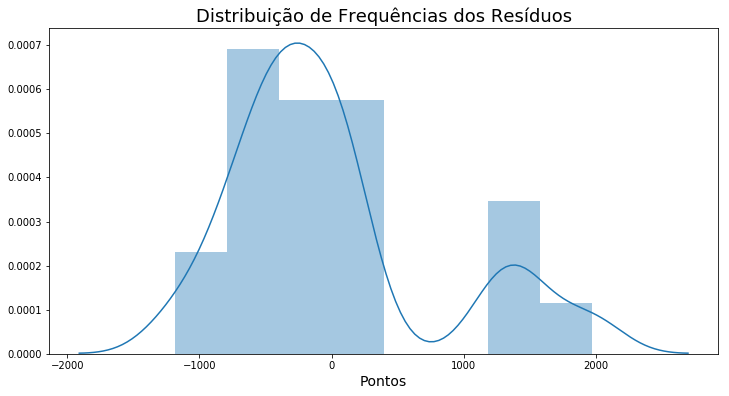

In [320]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Pontos', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Dados Avaliados (Métricas de TD)

In [513]:
df_all_metrics.head(3)

,uniqueID,ID,location,maturity,totalDevelopers,complexityPoints,start,end,leadTime,technicalDebt,taskScaling,taskGlobalDistance
0,PC:14187,TURK-372,India,4.0,13.0,60.0,2014-08-11 00:00:00,2015-02-06 00:00:00,179.0,796.0,0.216667,1.250000
1,PC:15448,BHA-328,Virtual,4.0,25.0,170.0,2015-01-19 00:00:00,2015-06-05 00:00:00,137.0,2474.0,0.147059,6.244748
2,PC:13350,TELSTRA-038,India,4.0,7.0,35.0,2015-02-09 00:00:00,2015-04-02 00:00:00,52.0,202.0,0.200000,3.463991


## Variável dependente y (TD) 

In [516]:
y
y.tolist()[0:3]

[796.0, 2474.0, 202.0]

## Features (X1, X2, X3, X4) que impactam TD (Y)

In [511]:
my_dict

{0: 'technicalDebt',
 1: 'leadTime',
 2: 'complexityPoints',
 3: 'totalDevelopers',
 4: 'taskScaling',
 5: 'maturity',
 6: 'taskGlobalDistance'}

In [322]:
X.head(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
0,179.0,60.0,13.0,0.216667
1,137.0,170.0,25.0,0.147059
2,52.0,35.0,7.0,0.200000


## Modelo 1 (LeadTime)

In [446]:
X1 = df_all_metrics[[my_dict[1]]]

### Criando os datasets de treino e de teste


In [447]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=1000)

### Instanciando a classe *LinearRegression()*


In [448]:
modelo_1 = LinearRegression()

### Utilizando o método *fit()* do objeto "modelo_1" para estimar nosso modelo linear utilizando os dados de TREINO (y1_train e X1_train)

In [449]:
modelo_1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [495]:
modelo_1_score = modelo_1.score(X1_train, y1_train).round(2)
print('Modelo com LeadTime')
print('R² = {}'.format(modelo_1.score(X1_train, y1_train).round(2)))
print('Modelo com as 4 variáveis')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com LeadTime
R² = 0.16
Modelo com as 4 variáveis
R² = 0.65


### Gerando previsões para os dados de TESTE (X_test e X1_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [453]:
y_previsto = modelo.predict(X_test)
y_previsto_1 = modelo_1.predict(X1_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [496]:
modelo_1_metrics_r2_score = metrics.r2_score(y1_test, y_previsto_1).round(2)
print('Modelo com LeadTime')
print('R² = {}'.format(modelo_1_metrics_r2_score))
print('Modelo com as quatro variáveis')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com LeadTime
R² = 0.11
Modelo com as quatro variáveis
R² = 0.06


## Modelo 2 (LeadTime, complexityPoints)

In [497]:
X2 = df_all_metrics[[my_dict[1], my_dict[2]]]
X2.head(3)

,leadTime,complexityPoints
0,179.0,60.0
1,137.0,170.0
2,52.0,35.0


### Criando os datasets de treino e de teste


In [459]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=1000)

### Instanciando a classe *LinearRegression()*


In [460]:
modelo_2 = LinearRegression()

### Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [461]:
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [498]:
modelo_2_score = modelo_2.score(X2_train, y2_train).round(2)
print('Modelo com LeadTime, complexityPoints')
print('R² = {}'.format(modelo_2_score))
print('Modelo com as 4 variáveis')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com LeadTime, complexityPoints
R² = 0.6
Modelo com as 4 variáveis
R² = 0.65


### Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [465]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [499]:
modelo_2_metrics_r2_score = metrics.r2_score(y2_test, y_previsto_2).round(2)
print('Modelo com LeadTime, ComplexityPontis')
print('R² = {}'.format(modelo_2_metrics_r2_score))
print('Modelo com as quatro variáveis')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com LeadTime, ComplexityPontis
R² = 0.09
Modelo com as quatro variáveis
R² = 0.06


## Modelo 3 (LeadTime, ComplexityPoints, totalDevelopers)

In [500]:
X3 = df_all_metrics[[my_dict[1], my_dict[2], my_dict[3]]]
X3.head(3)

,leadTime,complexityPoints,totalDevelopers
0,179.0,60.0,13.0
1,137.0,170.0,25.0
2,52.0,35.0,7.0


### Criando os datasets de treino e de teste


In [471]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=1000)

### Instanciando a classe *LinearRegression()*


In [472]:
modelo_3 = LinearRegression()

### Utilizando o método *fit()* do objeto "modelo_3" para estimar nosso modelo linear utilizando os dados de TREINO (y3_train e X3_train)

In [473]:
modelo_3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [501]:
modelo_3_score = modelo_3.score(X3_train, y3_train).round(2)
print('Modelo com LeadTime, ComplexityPoints, totalDevelopers')
print('R² = {}'.format(modelo_3_score))
print('Modelo com as 4 variáveis')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com LeadTime, ComplexityPoints, totalDevelopers
R² = 0.6
Modelo com as 4 variáveis
R² = 0.65


### Gerando previsões para os dados de TESTE (X_test e X3_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_3"

In [477]:
y_previsto = modelo.predict(X_test)
y_previsto_3 = modelo_3.predict(X3_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [502]:
modelo_3_metrics_r2_score = metrics.r2_score(y3_test, y_previsto_3).round(2)
print('Modelo com LeadTime')
print('R² = {}'.format(modelo_3_metrics_r2_score))
print('Modelo com as quatro variáveis')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com LeadTime
R² = 0.09
Modelo com as quatro variáveis
R² = 0.06


## Modelo 4 (LeadTime, ComplexityPoints, totalDevelopers, taskScaling)

In [503]:
X4 = df_all_metrics[[my_dict[1], my_dict[2], my_dict[3], my_dict[4]]]
X4.head(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
0,179.0,60.0,13.0,0.216667
1,137.0,170.0,25.0,0.147059
2,52.0,35.0,7.0,0.200000


### Criando os datasets de treino e de teste


In [483]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.3, random_state=1000)

### Instanciando a classe *LinearRegression()*


In [484]:
modelo_4 = LinearRegression()

### Utilizando o método *fit()* do objeto "modelo_4" para estimar nosso modelo linear utilizando os dados de TREINO (y4_train e X4_train)

In [485]:
modelo_4.fit(X4_train, y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [504]:
modelo_4_score = modelo_4.score(X4_train, y4_train).round(2)
print('Modelo com LeadTime, ComplexityPoints, totalDevelopers, taskScaling')
print('R² = {}'.format(modelo_4_score))

Modelo com LeadTime, ComplexityPoints, totalDevelopers, taskScaling
R² = 0.65


### Gerando previsões para os dados de TESTE (X_test e X4_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_4"

In [488]:
y_previsto = modelo.predict(X_test)
y_previsto_4 = modelo_4.predict(X4_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [505]:
modelo_4_metrics_r2_score = metrics.r2_score(y4_test, y_previsto_4).round(2)
print('Modelo com LeadTime, ComplexityPoints, totalDevelopers, taskScaling')
print('R² = {}'.format(modelo_4_metrics_r2_score))
print('Modelo com as quatro variáveis')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com LeadTime, ComplexityPoints, totalDevelopers, taskScaling
R² = 0.06
Modelo com as quatro variáveis
R² = 0.06


## Comparando os modelos

In [494]:
my_data_modelo = np.array([
    [modelo_1_score, modelo_1_metrics_r2_score],
    [modelo_2_score, modelo_2_metrics_r2_score],
    [modelo_3_score, modelo_3_metrics_r2_score],
    [modelo_4_score, modelo_4_metrics_r2_score],
                   ])
my_index_modelo = ['modelo_1', 'modelo_2', 'modelo_3', 'modelo_4']
my_columns_modelo = ['score', 'r2_score']
pd.DataFrame(data=my_data_modelo, index=my_index_modelo, columns=my_columns_modelo)

,score,r2_score
modelo_1,0.16,0.11
modelo_2,0.60,0.09
modelo_3,0.60,0.09
modelo_4,0.65,0.06


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$


## Obtendo métricas para o modelo com LeadTime

In [350]:
EQM_1 = metrics.mean_squared_error(y1_test, y_previsto_1).round(2)
REQM_1 = np.sqrt(metrics.mean_squared_error(y1_test, y_previsto_1)).round(2)
R2_1 = metrics.r2_score(y1_test, y_previsto_1).round(2)

pd.DataFrame([EQM_1, REQM_1, R2_1], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,2208725.26
REQM,1486.18
R²,0.11


## Obtendo métricas para o modelo com LeadTime, ComplexityPoints

In [375]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,2261796.57
REQM,1503.93
R²,0.09


## Obtendo métricas para o modelo com LeadTime, ComplexityPoints, TotalDevelopers

In [377]:
EQM_3 = metrics.mean_squared_error(y3_test, y_previsto_3).round(2)
REQM_3 = np.sqrt(metrics.mean_squared_error(y3_test, y_previsto_3)).round(2)
R2_3 = metrics.r2_score(y3_test, y_previsto_3).round(2)

pd.DataFrame([EQM_3, REQM_3, R2_3], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,2253371.63
REQM,1501.12
R²,0.09


## Obtendo métricas para o modelo com LeadTime, ComplexityPoints, TotalDevelopers e TaskScaling

In [509]:
EQM_4 = metrics.mean_squared_error(y4_test, y_previsto_4).round(2)
REQM_4 = np.sqrt(metrics.mean_squared_error(y4_test, y_previsto_4)).round(2)
R2_4 = metrics.r2_score(y4_test, y_previsto_4).round(2)

pd.DataFrame([EQM_4, REQM_4, R2_4], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,2324809.84
REQM,1524.73
R²,0.06


## Comparando as métricas

In [529]:
my_data_metricas = np.array([
    [EQM_1, REQM_1, R2_1], 
    [EQM_2, REQM_2, R2_2], 
    [EQM_3, REQM_3, R2_3], 
    [EQM_4, REQM_4, R2_4], 
    ])
my_index_metricas = ['modelo1', 'modelo2', 'modelo3', 'modelo4']
my_columns_metricas = ['EQM', 'REQM', 'R²']

df_my_metricas = pd.DataFrame(data=my_data_metricas, index=my_index_metricas, columns=my_columns_metricas)
df_my_metricas

,EQM,REQM,R²
modelo1,2208725.26,1486.18,0.11
modelo2,2261796.57,1503.93,0.09
modelo3,2253371.63,1501.12,0.09
modelo4,2324809.84,1524.73,0.06
